In [134]:
#import necessary packages

import numpy as np
import matplotlib.pyplot as plt

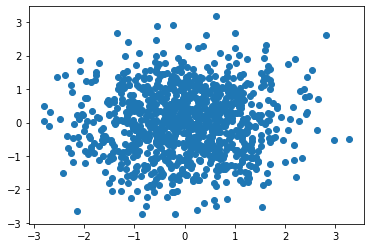

In [135]:
#create data 

N=1000
X=np.zeros((N,2))

for i in range(0,N):
    X[i,0]=np.random.randn()
    X[i,1]=np.random.randn()
 
normalize=1
if normalize:
        data=X
        stats = (data.mean(axis=0), data.std(axis=0))
        data = (data - stats[0]) / stats[1]    
    
    
X=data    
plt.scatter(X[:,0],X[:,1])
plt.show()

In [136]:
# use seaborn makblob to creata data

N=8
k=2 #number of clusters
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=N, centers=k, n_features=2,random_state=0)

import pandas as pd

dfX=pd.DataFrame(X)
dfX.head(2)

,0,1
0,1.120314,5.758061
1,3.549347,0.692505


In [137]:
# select centroids 

#k=3 #number of clusters

##1)randomly
#K_rand_nums=np.random.randint(N,size=k)
#init_centroids_cordinates=np.zeros((k,2))
#for i in range(0,len(K_rand_nums)): 
#    init_centroids_cordinates[i,:]=X[K_rand_nums[i],:]

#init_centroids_cordinates    

In [138]:
# 2) or you can use random
import random
init_centroids = random.sample(range(0, len(X)), k)
centroids = []
for i in init_centroids:
    #centroids.append(X[i,:])
    #or
    centroids.append(dfX.loc[i])
centroids

[0    2.368335
 1    0.043568
 Name: 6, dtype: float64,
 0    2.499131
 1    1.231338
 Name: 3, dtype: float64]

In [139]:
centroids = np.array(centroids)

In [140]:
# distance between two points:
def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [141]:
# assign data points to each centroid. We have 5 centroids. so indices:1-5
def findClosestCentroids(ic, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    #print(distance.shape)    
    return assigned_centroid


In [142]:
#test
get_centroids=findClosestCentroids(init_centroids,X)
get_centroids

[1, 1, 1, 1, 1, 1, 1, 1]

In [143]:
#move centroids
import pandas as pd
def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],axis=1) #adds as a column
    print(new_df)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        print(current_cluster)
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

          0         1  cluster
0  1.120314  5.758061        0
1  3.549347  0.692505        1
2  2.816305  1.019339        1
3  2.499131  1.231338        1
4  0.873051  4.714386        0
5  2.843828  3.326509        1
6  2.368335  0.043568        1
7  1.926358  4.152430        0
          0         1
0  1.120314  5.758061
4  0.873051  4.714386
7  1.926358  4.152430
          0         1
1  3.549347  0.692505
2  2.816305  1.019339
3  2.499131  1.231338
5  2.843828  3.326509
6  2.368335  0.043568
[0    1.306574
1    4.874959
dtype: float64, 0    2.815389
1    1.262652
dtype: float64]


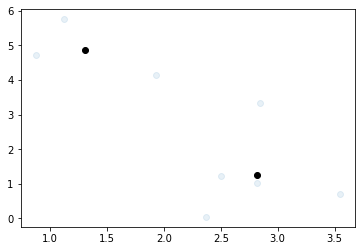

In [133]:
for i in range(1):
    get_centroids = findClosestCentroids(centroids, X)
    centroids = calc_centroids(get_centroids, X)
    #print(centroids)
    plt.figure()
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
    plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
    plt.show()

# dimension reduction

In [33]:
import cv2
im = cv2.imread('frog.png')
im

In [ ]:
im.sgape

In [ ]:
im = (im/255).reshape(155*201, 3)

In [ ]:
random_index = random.sample(range(0, len(im)), 10)

In [ ]:
centroids = []
for i in random_index:
    centroids.append(im[i])
centroids = np.array(centroids)

In [ ]:
im = np.array(im)

In [ ]:
for i in range(20):
    get_centroids = findClosestCentroids(centroids, im)
    centroids = calc_centroids(get_centroids, im)

In [ ]:
im_recovered = im.copy()
for i in range(len(im)):
    im_recovered[i] = centroids[get_centroids[i]]

In [ ]:
im_recovered = im_recovered.reshape(155, 201, 3)

In [ ]:
im1 = cv2.imread('frog.png')
import matplotlib.image as mpimg
fig,ax = plt.subplots(1,2)
ax[0].imshow(im1)
ax[1].imshow(im_recovered)